In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv(r'https://drive.google.com/uc?export=download&id=1-kg7NdNsfG_WUcaD66hWLs3aE59HYYgh')

In [3]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [5]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [7]:
df['study_hours'].fillna(df['study_hours'].mean(), inplace = True)

In [8]:
df.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [10]:
X = df.drop(columns = ['student_marks'])
y = df['student_marks']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 51)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 1)

(40, 1)

(160,)

(40,)

Text(0, 0.5, 'Marks')

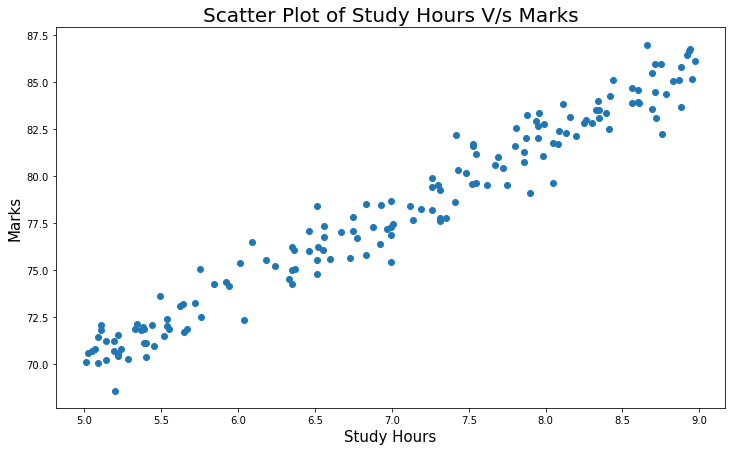

In [21]:
plt.figure(figsize = (12, 7))
plt.scatter(X_train, y_train)
plt.title('Scatter Plot of Study Hours V/s Marks', fontsize = 20)
plt.xlabel('Study Hours', fontsize = 15)
plt.ylabel('Marks', fontsize = 15)

In [100]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9514124242154464

In [101]:
ls = Lasso(alpha = 1)
ls.fit(X_train, y_train)
ls.score(X_test, y_test)

0.9382901022367997

In [102]:
rd = Ridge(alpha = 12)
rd.fit(X_train, y_train)
rd.score(X_test, y_test)

0.9538321138298326

In [115]:
y_pred = rd.predict(X_test).round(2)
y_pred1 = lr.predict(X_test).round(2)
y_pred2 = ls.predict(X_test).round(2)

In [116]:
# Root Mean Square Error is minimum in Ridge

mse = mean_squared_error(y_test, y_pred)
mse1 = mean_squared_error(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)
display(np.sqrt(mse),np.sqrt(mse1),np.sqrt(mse1))

1.0250499987805473

1.0528687002660873

1.0528687002660873

In [ ]:
# Here we are getting Maximum accuracy at Ridge

In [103]:
rd.coef_

array([3.74958677])

In [104]:
rd.intercept_

51.75291888713045

In [105]:
rd.predict([[4]])

array([66.75126598])

In [1]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ['Study Hours', 'Actual Marks', 'Predicted Marks'])

NameError: name 'pd' is not defined

Text(0, 0.5, 'Marks')

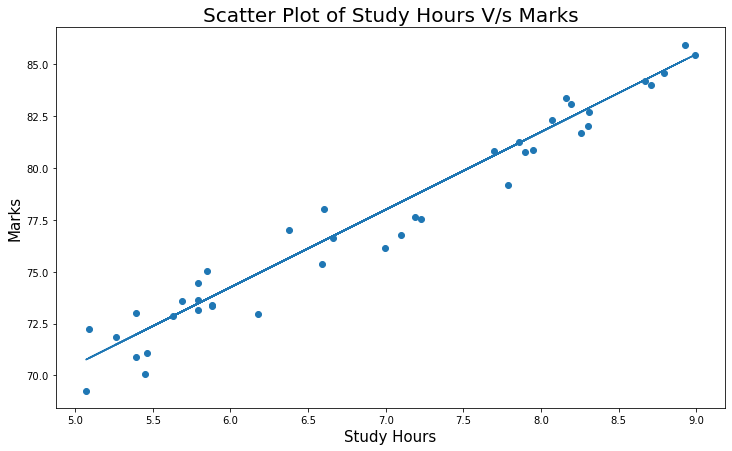

In [109]:
plt.figure(figsize = (12, 7))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.title('Scatter Plot of Study Hours V/s Marks', fontsize = 20)
plt.xlabel('Study Hours', fontsize = 15)
plt.ylabel('Marks', fontsize = 15)

## Save Model

In [110]:
import joblib

In [111]:
joblib.dump(rd, 'StudentMarksPredicterModel.pkl')

['StudentMarksPredicterModel.pkl']

In [112]:
model = joblib.load('StudentMarksPredicterModel.pkl')

In [113]:
model.predict([[(0.1)]])

array([52.12787756])